# Praktikum: Session 2
[Video](https://mstream.hm.edu/paella/ui/watch.html?id=4ffc63cb-4d0a-445f-a43a-d0888176a117)

# Estimator API: Erkennen handschriftlicher Zahlen
Ziel ist es, eine handschriftlich geschriebene Zahl zu erkennen.

Genauer:

- Gegeben: Datenbank von Bildern handschriftlich geschriebener Zahlen **mit** zugehörigen Labels (d.h. zu jedem Bild gibt es auch noch die direkte Information, welche Zahl darauf zu sehen ist)
- Vorgehen: Ein Modell soll mit einigen dieser gelabelten Daten trainiert werden, so dass es dann in der Lage ist, einem unbekannten Bild das korrekte Label (0-9) zuzuordnen.

Somit handelt es sich um ein *supervised* Problem. Diese Art der Aufgabenstellung heißt **Klassifizierung**, da als Werte nur *diskrete Klassen* (hier [0,1,2,...,9]) und *keine kontinuierlichen Werte* zugelassen sind.

## Einlesen und Betrachten der Daten
Die zu betrachtenden Daten sind als Teil von ``sklearn`` verfügbar und werden im Folgenden eingelesen und in der Variable ``digits`` gespeichert:

In [28]:
%matplotlib inline
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

import seaborn as sns; sns.set()
from sklearn.datasets import load_digits
digits = load_digits()

Laut der Dokumentation der ``load_digits`` Funktion, liefert diese einen sog. ``Bunch``, das ist grob gesagt eine Ansammlung verschiedener Daten. Hier sind dies insbesondere:

- ``data``: die zu lernenden Daten
- ``images``: die zugehörigen Bilder
- ``target``: die Labels

Auf diese können Sie zugreifen via ``digits.key``, wobei ``key`` durch das ersetzt werden muss, was Sie haben wollen.

Greifen Sie auf die Bilder zu. Wie viele gibt es in dem Datensatz? Welche Breite und Höhe haben diese?

*Tipp: Mit der nachgestellten Methode ``obj.shape`` können Sie sich die Form eines Objekts ``obj`` anzeigen lassen.*

In [29]:
digits.data[0]

array([ 0.,  0.,  5., 13.,  9.,  1.,  0.,  0.,  0.,  0., 13., 15., 10.,
       15.,  5.,  0.,  0.,  3., 15.,  2.,  0., 11.,  8.,  0.,  0.,  4.,
       12.,  0.,  0.,  8.,  8.,  0.,  0.,  5.,  8.,  0.,  0.,  9.,  8.,
        0.,  0.,  4., 11.,  0.,  1., 12.,  7.,  0.,  0.,  2., 14.,  5.,
       10., 12.,  0.,  0.,  0.,  0.,  6., 13., 10.,  0.,  0.,  0.])

In [30]:
digits.images.shape

(1797, 8, 8)

Es handelt sich um 1797 Bilder mit jeweils 8x8 Pixeln. Wir visualisieren die ersten 100:

- Was hat es mit der kleinen grünen Zahl auf sich?
- Wie wird diese im Plot erzeugt?

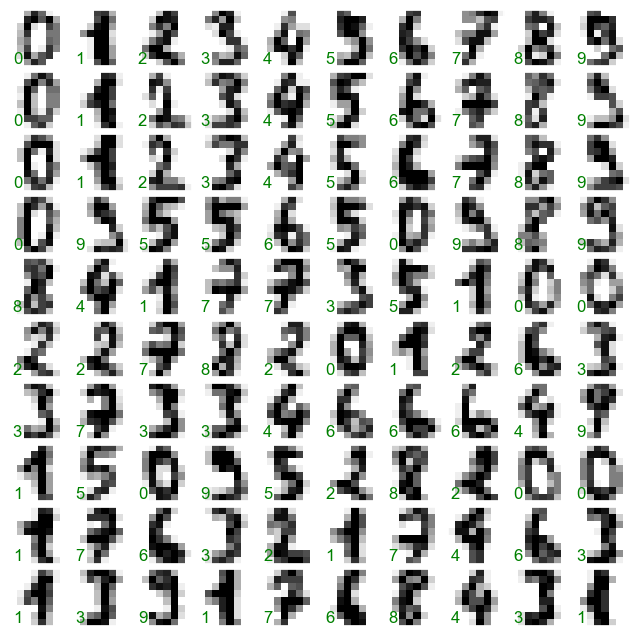

In [31]:
import matplotlib.pyplot as plt

fig, axes = plt.subplots(10, 10, figsize=(8, 8),
                         subplot_kw={'xticks':[], 'yticks':[]},
                         gridspec_kw=dict(hspace=0.1, wspace=0.1))

for i, ax in enumerate(axes.flat):
    ax.imshow(digits.images[i], cmap='binary', interpolation='nearest')
    ax.text(0.05, 0.05, str(digits.target[i]),
            transform=ax.transAxes, color='green')

## Extrahiere Daten für Modell

Wir brauchen wieder eine Features Matrix und einen Target Vektor. Diese sind in den Daten ``digits`` schon enthalten, müssen aber noch extrahiert werden. Nennen Sie die Features Matrix ``X`` und den Labels Vektor ``y``. Welche Dimension haben ``X`` und ``y``?

In [32]:
X = digits.data
X.shape

(1797, 64)

In [33]:
y = digits.target
y.shape

(1797,)

## Visualisierung durch Dimensionsreduktion
Es stellt sich die Frage, wie schwierig es wohl sein wird, diese Daten zu klassifizieren. Möglicherweise gibt eine dimensionsreduzierte grafische Darstellung der Datenpunkte (wie viele sind es?) einen Anhaltspunkt.

Konkret: Wenn man die hochdimensionalen Datenpunkte (welche Dimension haben die Punkte nochmal?) zweidimensional so darstellen kann, dass man sie mit dem Auge gut klassifizieren kann, so wird es wahrscheinlich ein recht einfacher ML-Algorithmus auch können...

Daher wollen wir nun zwei Dimensionsreduktionsmodelle verwenden, um eben diese Aufgabe durchzuführen.

### Erster Versuch: PCA

Verwenden Sie die Principal Component Analysis (PCA), um die Daten zweidimensional zu repräsentieren.

- PCA finden Sie in der Modellklasse ``sklearn.decompostion``
- Welche Hyperparameter müssen Sie wie wählen?
- Machen Sie sich klar, welchen Teil der Ihnen zur Verfügung stehenden Daten Sie in diesem Teil der Aufgabe benötigen.
- Da bei der Dimensionsredutkion keine Vorhersage (Prediction) vorgenommen wird, wird das fertige Dimensionsreduktionsmodell auch nicht per ``.predict`` angewendet. Die passende Methode heißt ``.transform``

Nennen Sie die transformierte Version der Daten ``X_PCA``.

In [34]:
from sklearn.decomposition import PCA
model = PCA(n_components=2)
model.fit(X)
X_PCA = model.transform(X)

Die somit erhaltene zweidimensionale Repräsentation der Daten sollen nun grafisch dargestellt werden (das war ja Sinn der Übung...).

Überlegen Sie sich **bevor Sie die nächste Zelle ausführen**, wie Sie die Daten gerne darstellen würden. An dieser Stelle brauchen Sie sich nicht zu überlegen, wie man eine solche Darstellung dann umsetzen würde.
Hier nun mein Vorschlag der Visualisierung:

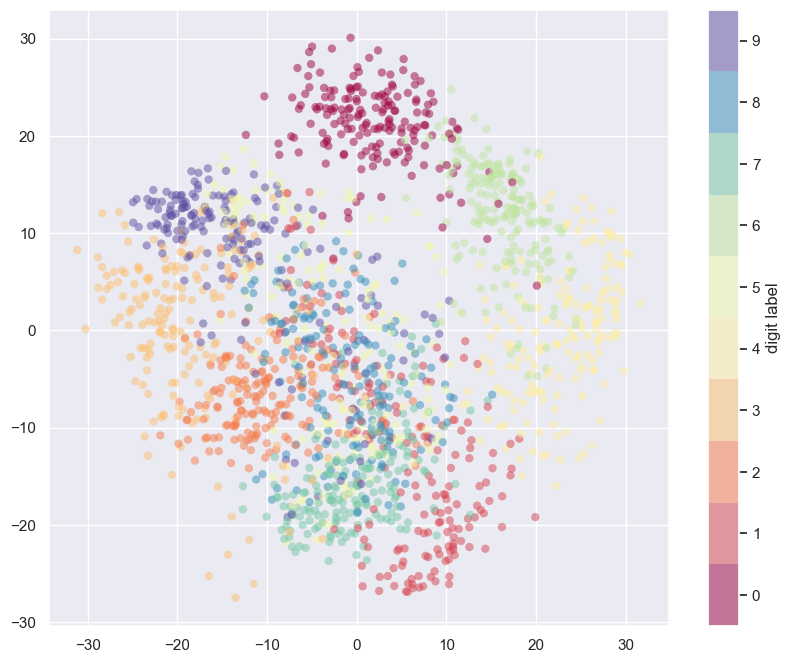

In [35]:
plt.figure(figsize=(10,8));
plt.scatter(X_PCA[:,0], X_PCA[:,1], c=digits.target, edgecolor='none', alpha=0.5,
            cmap=plt.cm.get_cmap('Spectral', 10))
plt.colorbar(label='digit label', ticks=range(10))
plt.clim(-0.5, 9.5);

Versuchen Sie, anhand des obigen Codes nachzuvollziehen, wie der Plot generiert wurde.

Ordnen Sie das erhaltene Ergebnis ein. Würden Sie auf Basis dieses Ergebnisses die These vertreten, dass die Daten auf jeden Fall leicht in die zehn Kategorien eingeteilt werden können?

### 2. Versuch: Isomap
Die Dimensionsreduktion mit dem *linearen* Verfahren PCA hat kein wirklich gutes Ergebnis geliefert. Daher wollen wir ein *nicht-lineares* Verfahren zur Dimensionsreduktion versuchen: Isomap

- Finden Sie raus, wo Isomap in ``sklearn`` enthalten ist (*Tipp: Verwenden Sie eine Suchmaschine*).
- Welche Hyperparameter müssen Sie wie wählen?
- Verwenden Sie hier (nach dem Trainieren) die Methode ``transform`` um die Daten zu transformieren.

Nennen Sie die transformierte Version der Daten ``X_iso``.

In [36]:
from sklearn.manifold import Isomap
model = Isomap(n_components=2)
model.fit(X)
X_iso = model.transform(X)

c:\ProgramData\Anaconda3\lib\site-packages\sklearn\manifold\_isomap.py:304: UserWarning: The number of connected components of the neighbors graph is 2 > 1. Completing the graph to fit Isomap might be slow. Increase the number of neighbors to avoid this issue.
  self._fit_transform(X)
c:\ProgramData\Anaconda3\lib\site-packages\scipy\sparse\_index.py:103: SparseEfficiencyWarning: Changing the sparsity structure of a csr_matrix is expensive. lil_matrix is more efficient.
  self._set_intXint(row, col, x.flat[0])


Stellen Sie das Ergebnis dieser Transformation der Daten auf die gleiche Weise dar wie bei PCA. Bewerten Sie auch hier das Ergebnis. Wie sieht es jetzt mit der oben formulierten Hypothese aus?

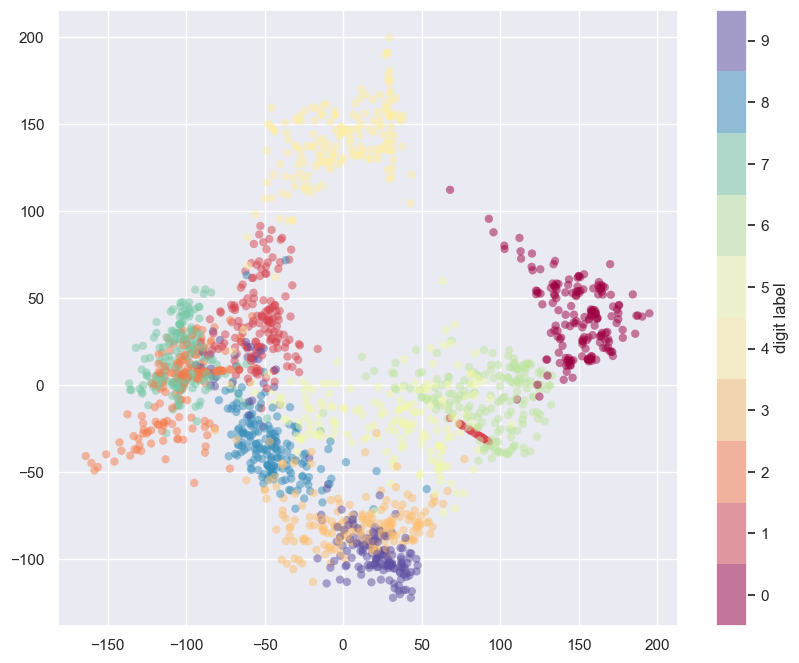

In [37]:
plt.figure(figsize=(10,8));
plt.scatter(X_iso[:,0], X_iso[:,1], c=digits.target, edgecolor='none', alpha=0.5,
            cmap=plt.cm.get_cmap('Spectral', 10))
plt.colorbar(label='digit label', ticks=range(10))
plt.clim(-0.5, 9.5);

## Klassifizierung der Ziffern
Nachdem wir nun zuversichtlich sind, dass "nicht allzu komplizierte" Methoden vielleicht schon ausreichen, um die Klassifizierung dieser Ziffern durchzuführen, wollen wir zwei Modellklassen ausprobieren:

1.   K-Nearest Neighbors
2.   Gaussian Naive Bayes

Bevor wir die einzelnen Modelle anlegen, splitten wir die Daten auf in Trainings- und Testdaten.

Verwenden Sie ``train_test_split`` aus ``sklearn.model_selection``, um die Daten im Verhältnis 80/20 in Trainings- und Testdaten aufzusplitten.

In [38]:
from sklearn.model_selection import train_test_split
Xtrain, Xtest, ytrain, ytest = train_test_split(X,y, train_size=0.8)

### Zusatz: Stratification


Hier kann etwas schiefgehen: Da es diskrete Labels gibt (hier [0,...,9]) sollten die relativen Häufigkeiten der Labels in den Trainings- und Testdaten gleich sein. Extremfall: Im Trainingsset sind nur 3er enthalten... Das ist in unserem Fall natürlich recht unwahrscheinlich, da die Ziffern gleich verteilt sind. In anderen Datensätzen kann es jedoch durchaus vorkommen, dass ein Feature eine oder mehrere kleine "Aussreisser-Gruppen" hat, deren Werte sich deutlich von den meisten anderen unterscheiden. Beim Generieren des Trainings-/Testsplits ist es dann wichtig darauf zu achten, dass beide Mengen repräsentativ sind. Dies kann man in der ``train_test_split`` Funktion dadurch erzwingen, dass man ``stratify = Name_des_entsprechenden_Features`` mit als Argument übergibt.

Untersuchen Sie, ob dies hier die Ziffern im Trainings- und Testset gleich verteilt sind. Dazu können Sie z.B. die Funktion ``unique`` aus dem Package ``numpy`` verwenden. Sorgen Sie für eine bessere Gleichverteilung, indem Sie die o.g. Stratification verwenden.

In [39]:
import numpy as np

In [40]:
np.unique(ytest, return_counts=True)

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 array([33, 47, 31, 41, 38, 36, 39, 28, 41, 26], dtype=int64))

In [41]:
counts = np.unique(ytest, return_counts=True)[1]
freq = counts/counts.sum()
freq

array([0.09166667, 0.13055556, 0.08611111, 0.11388889, 0.10555556,
       0.1       , 0.10833333, 0.07777778, 0.11388889, 0.07222222])

In [42]:
Xtrain, Xtest, ytrain, ytest = train_test_split(X,y, train_size=0.8, stratify=y)

### K-Nearest Neighbors

- Verwenden Sie den k-Nearest-Neighbors Algorithmus, um die Ziffern des Testsets zu klassifizieren. Speichern Sie die hierfür generierten Labels in der Variablen ``y_model``.
- Geben Sie die Genauigkeit des Modells an. Verwenden Sie dafür die Funktion ``accuracy_score``, welche Sie im Package ``sklearn.metrics`` finden.

In [43]:
from sklearn.neighbors import KNeighborsClassifier
model = KNeighborsClassifier()
model.fit(Xtrain, ytrain)
y_model = model.predict(Xtest)

In [44]:
from sklearn.metrics import accuracy_score
accuracy_score(ytest, y_model)

0.9888888888888889

Es wäre interessant zu wissen, welche Ziffern falsch klassifiziert wurden. Überlegen Sie sich, wie eine hierfür geeignete Darstellung aussehen könnte.

Führen Sie **danach** die nächste Zelle aus, welche eine Visualisierung erzeugt. Interpretieren Sie das Ergebnis. Ist es sinnvoll/nachvollziehbar? Gibt es Hinweise darauf, wie das Modell verbessert werden kann?

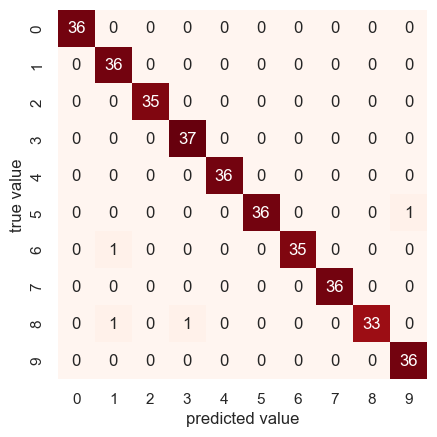

In [45]:
from sklearn.metrics import confusion_matrix

mat = confusion_matrix(ytest, y_model)

sns.heatmap(mat, square=True, annot=True, cbar=False, cmap='Reds')
plt.xlabel('predicted value')
plt.ylabel('true value');

Verwenden Sie Cross-Validation, um eine zuverlässigere Aussage über die Genauigkeit des Modells zu erhalten.

In [46]:
from sklearn.model_selection import cross_val_score
scores = cross_val_score(model, Xtrain, ytrain, cv=10)
scores

array([0.99305556, 0.99305556, 0.98611111, 0.96527778, 0.99305556,
       0.98611111, 0.97916667, 0.98601399, 0.97202797, 0.99300699])

In [47]:
scores.mean()

0.9846882284382286

Ein k-Nearest-Neighbors Modell hat einen Hyperparameter, nämlich die Anzahl der einzubeziehenden nächsten Nachbarn ``n_neighbors``. Untersuchen Sie, welchen Wert man hierfür verwenden sollte. Verwenden Sie diesen Wert und geben Sie die auf den Testdaten erreichte Genauigkeit an.

#### Tipps:

- Da der Default des Wertes 5 beträgt, scheint es sinnvoll, in der Nähe dieses Wertes zu suchen. Verwenden Sie also z.B. ``n_neighbors = 1,...,10``. Legen Sie für jeden Wert ein Modell an.
- Jedes dieser 10 Modelle sollte nun bewertet (validiert) werden. Dafür bietet sich Cross-Validation an. Je nachdem, wie viele Folds Sie verwenden, werden Sie pro Modell mehrere (=Anzahl der verwendeten Folds) Scores zurückgekommen, diese sollten gemittelt werden.
- Nun haben Sie eine Bewertung für jedes der 10 Modelle.
- Wählen Sie dasjenige mit der besten Bewertung aus und trainieren Sie dieses auf den gesamten Trainingsdaten.

#### Lösungsvorschlag:

In [48]:
scores = []             # Lege leere Liste an; die Bewertung für jeden Wert von n_neighbors soll hierin gespeichert werden
for n in range(10):     # n durchläuft die Werte 0,...,9
  model = KNeighborsClassifier(n_neighbors=n+1)        # das entsprechende Modell wird erzeugt
  # CV wird durchgeführt, die erhaltenen Scores gemittelt und an die scores-Liste angehängt (append)
  scores.append(cross_val_score(model, Xtrain, ytrain, cv=5).mean())
scores


[0.9846907665505226,
 0.9805168408826945,
 0.98329945799458,
 0.985387630662021,
 0.9826050135501354,
 0.9798223964382501,
 0.9819154084397986,
 0.9791279519938056,
 0.9756508904374759,
 0.9763453348819203]

Das beste Modell erhält man hier also für ``n_neighbors=1``, auch wenn es keinen großen Unterschied macht. Wir erzeugen nun also ein Modell mit eben dieser Wahl des Hyperparameters, trainieren es auf den ganzen Trainingsdaten und testen es anschließend auf den Testdaten.

In [49]:
model = KNeighborsClassifier(n_neighbors=1)
model.fit(Xtrain, ytrain)
y_model = model.predict(Xtest)
accuracy_score(ytest, y_model)

0.9861111111111112

### Gaussian Naive Bayes

- Verwenden Sie ein Gaussian Naive Bayes Modell (diese Modellklasse verfügt über *keine* Hyperparameter), um die Ziffern des Testsets zu klassifizieren. Speichern Sie die hierfür generierten Labels in der Variablen ``y_model`` und geben Sie wieder die Genauigkeit des Modells an.
- Generieren Sie wie oben die sog. *Confusion Matrix*.

In [50]:
from sklearn.naive_bayes import GaussianNB
model = GaussianNB()
model.fit(Xtrain, ytrain)
y_model = model.predict(Xtest)
accuracy_score(ytest, y_model)

0.85

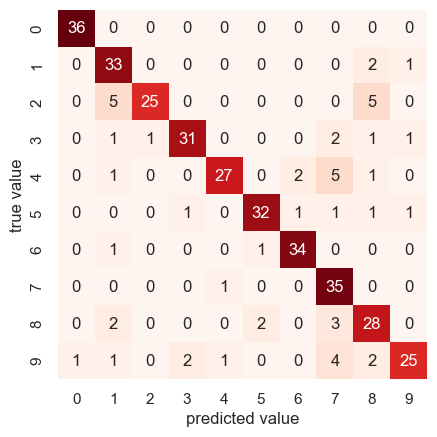

In [51]:
from sklearn.metrics import confusion_matrix

mat = confusion_matrix(ytest, y_model)

sns.heatmap(mat, square=True, annot=True, cbar=False, cmap='Reds')
plt.xlabel('predicted value')
plt.ylabel('true value');